# Movie Genre Predictor

In [50]:
# Importing essential libraries
import numpy as np
import pandas as pd
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
%matplotlib inline

In [51]:
df = pd.read_csv('data.csv')
df = shuffle(df)

##### Finding unique genres

In [52]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['crime',
 'fantasy',
 'history',
 'horror',
 'psychology',
 'romance',
 'science',
 'sports',
 'thriller',
 'travel']

#### Genre Count Visualization

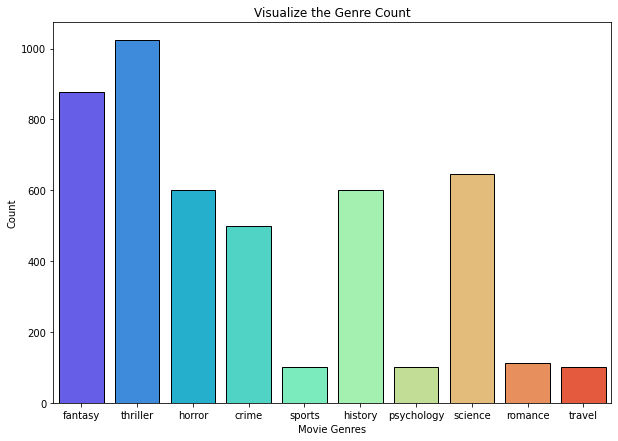

In [53]:
plt.figure(figsize=(10,7))
sns.countplot(x='genre', data=df,palette='rainbow',edgecolor=(0,0,0))
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Visualize the Genre Count')
plt.show()

##### Mapping the genres to values 

In [54]:
genre_mapper = {'fantasy': 0, 'science': 1, 'crime': 2, 'history':3, 'horror':4, 'thriller':5, 'psychology':6, 'romance':7, 'sports': 8,'travel' : 9}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,index,genre,text
325,325,0,Artemis Fowl II is the thirteen-year-old son ...
4643,4643,0,The apprenticeship is over—now the real test h...
2676,2676,5,It begins about four or five years after the ...
4562,4562,0,Return to Fillory in the riveting sequel to Th...
4606,4606,0,"Finnikin of the Rock and his guardian, Sir Top..."
2003,2003,4,"The novel The Boats of the ""Glen Carrig"" star..."
2891,2891,5,"Hamilton, allegedly an expert on the jungle, ..."
1129,1129,2,"Inspector Tyador Borlú, of the Extreme Crime ..."
3598,3598,8,Alternate cover for this ASIN can be found her...
1383,1383,2,The novel begins with the notorious Spare Cha...


###### Finding NaN values

In [55]:
df.isna().any()

index    False
genre    False
text     False
dtype: bool

In [56]:
df.drop('index', axis=1, inplace=True)
df.columns
df = df.reset_index(drop = True)

##### Importing essential libraries for performing Natural Language Processing

In [57]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

[nltk_data] Downloading package stopwords to C:\Users\AKSHAR
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
df.shape

(4657, 2)

#### Data Preprocessing

In [59]:
corpus = []
ps = LancasterStemmer()
for i in range(0, df.shape[0]):
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])
  dialog = dialog.lower()
  words = dialog.split()
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in dialog_words]
  dialog = ' '.join(words)
  corpus.append(dialog)

In [60]:
len(corpus)

4657

### Bag Of Words Model

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer().fit(corpus)
X_tokens = cv.get_feature_names()
X = cv.transform(corpus).toarray()
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
df_count_vect = pd.DataFrame(data = X,columns = X_tokens)
y = df['genre'].values
df_count_vect = df_count_vect[df_count_vect.columns[df_count_vect.sum()>50]]
df_count_vect

# X=df_count_vect.to_numpy()
# X = cv.transform(X).toarray()


,abandon,abbey,abbot,abduc,abl,aboard,abraham,abs,absolv,absorb,...,year,yeerk,yet,york,you,young,yuuzh,zoey,zomby,zon
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4654,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4655,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(X_train)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
X_train size: (3725, 31492), X_test size: (932, 31492)


In [64]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

### Multinomial Naive Bayes

In [65]:
# Predicting the Test set results
y_pred = nb_classifier.predict(X_test)

##### Accuracy

In [66]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score1 = accuracy_score(y_test, y_pred)
print("Accuracy : {}%".format(round(score1*100,2)))

Accuracy : 68.03%


In [67]:
cm = confusion_matrix(y_test, y_pred)

#### Hyperparameter tuning

In [68]:
classifier = None
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,0.5,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    classifier = temp_classifier
    best_accuracy = score
    alpha_val = i
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 68.78%
Accuracy score for alpha=0.2 is: 68.56%
Accuracy score for alpha=0.3 is: 68.13%
Accuracy score for alpha=0.4 is: 67.27%
The best accuracy is 68.78% with alpha value as 0.1


#### Function for Genre Prediction

In [69]:

# df_count_vect = df_count_vect[df_count_vect.columns[df_count_vect.sum()>75]]
# df_count_vect
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)
  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [70]:
pred = genre_prediction('''Whilst investigating the death of a local swordsman, a stable private detective called Raymond Vader uncovers a legend about a supernaturally-cursed, tiny ruler circulating throughout Wales. As soon as anyone uses the ruler, he or she has exactly 28 days left to live.

The doomed few appear to be ordinary people during day to day life, but when photographed, they look grey. A marked person feels like a red dog to touch.

Raymond gets hold of the ruler, refusing to believe the superstition. A collage of images flash into his mind: a splendid rat balancing on an evil swordsman, an old newspaper headline about a sausage accident, a hooded kitten ranting about toenails and a drinking well located in a beautiful place.

When Raymond notices his warts have dog-like properties, he realises that the curse of the tiny ruler is true and calls in his brother, a navigator called Steven Cox, to help.

Steven examines the ruler and willingly submits himself to the curse. He finds that the same visions flash before his eyes. He finds the splendid rat balancing on an evil swordsman particularly chilling. He joins the queue for a supernatural death.

Raymond and Steven pursue a quest to uncover the meaning of the visions, starting with a search for the hooded kitten. Will they be able to stop the curse before their time is up?''')
print(['crime',
 'fantasy',
 'history',
 'horror',
 'psychology',
 'romance',
 'science',
 'sports',
 'thriller',
 'travel'])
if(pred==4):
    pred = pred -1
print(movie_genre[pred])
# lst = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance','sci-fi','thriller']
# print(lst[0])


['crime', 'fantasy', 'history', 'horror', 'psychology', 'romance', 'science', 'sports', 'thriller', 'travel']
horror
